# EXPLORATORY DATA ANALYSIS

## Topic: Future 50 restaurants

## Objective
* To compare sales and units

## Introduction
-> This is a basic EDA to analyze the relationship sales and units. It determines whether the sales of a restaurant affects the number of units it has.

## Kaggle Link:
This code was taken from kaggle under the name of "Restaurant Business Rank 2020"

https://www.restaurantbusinessonline.com/future-50-2020

### Importing different methods

In [2]:
#importing numpy pandas mathplot and other methods

import pandas as pd #is used to manipulate data
import numpy as np #is used for mathematical calculation
import matplotlib.pyplot as plt #is used for data visualization
%matplotlib inline
import seaborn as sns #also used for data visualization

#### Now, Let's read the data file

In [3]:
#reading the data file
df= pd.read_csv('Future50.csv')

In [5]:
#we can also take a quick look at our data set
df.head()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.50%,26,116.70%,1150,1
1,2,Clean Juice,"Charlotte, N.C.",44,121.90%,105,94.40%,560,0
2,3,Slapfish,"Huntington Beach, Calif.",21,81.00%,21,90.90%,1370,0
3,4,Clean Eatz,"Wilmington, N.C.",25,79.70%,46,58.60%,685,0
4,5,Pokeworks,"Irvine, Calif.",49,77.10%,50,56.30%,1210,0


In [6]:
#Replacing variable
df.replace({'Yes':0,'No':1,}, inplace=True)
df.head()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.50%,26,116.70%,1150,1
1,2,Clean Juice,"Charlotte, N.C.",44,121.90%,105,94.40%,560,0
2,3,Slapfish,"Huntington Beach, Calif.",21,81.00%,21,90.90%,1370,0
3,4,Clean Eatz,"Wilmington, N.C.",25,79.70%,46,58.60%,685,0
4,5,Pokeworks,"Irvine, Calif.",49,77.10%,50,56.30%,1210,0


#### Intepretation
- by default we can look at the fist 5 values by this function but it can be given an index too

In [7]:
#we use this function to print summary statistics
df.describe()

,Rank,Sales,Units,Unit_Volume,Franchising
count,50.00000,50.000000,50.000000,50.00000,50.000000
mean,25.50000,33.780000,34.700000,1592.60000,0.420000
std,14.57738,9.596534,24.527577,994.67677,0.498569
min,1.00000,20.000000,7.000000,465.00000,0.000000
25%,13.25000,24.250000,16.000000,867.50000,0.000000
50%,25.50000,34.500000,27.000000,1260.00000,0.000000
75%,37.75000,42.000000,45.500000,2020.00000,1.000000
max,50.00000,49.000000,105.000000,4300.00000,1.000000


#### Intepretation
- here different features such as mean, sd, minimum, maximum etc are described

In [8]:
#from this function we get the complete information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         50 non-null     int64 
 1   Restaurant   50 non-null     object
 2   Location     50 non-null     object
 3   Sales        50 non-null     int64 
 4   YOY_Sales    50 non-null     object
 5   Units        50 non-null     int64 
 6   YOY_Units    50 non-null     object
 7   Unit_Volume  50 non-null     int64 
 8   Franchising  50 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 3.6+ KB


#### Intepretation
- This feature allows us to be aware about the different kinds of information in our data set
- we can know the name of the class of our data set
- we also get information about the total range and the total no. of columns
- we can see whether a coloumn is null or not
- we can know the data types used in the data set
- the memory usage of the data set is also specified

## Now we can procced with our EDA cycle

#### HISTOGRAM

In [9]:
#First we check our coloumns
df.columns

Index(['Rank', 'Restaurant', 'Location', 'Sales', 'YOY_Sales', 'Units',
       'YOY_Units', 'Unit_Volume', 'Franchising'],
      dtype='object')

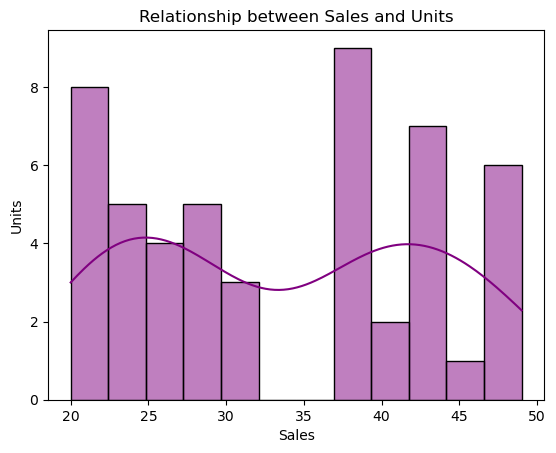

In [10]:
#seaborn histograms
sns.histplot(df['Sales'], kde=True,bins=12, color='purple',edgecolor='black')
#adding labels
plt.title('Relationship between Sales and Units')
plt.xlabel('Sales')
plt.ylabel('Units')
plt.show()

#### intepretation
- The above figure shows a histogram of the relationship between Sales and Franchising
- By looking at the kde we find this graph to be multi-modal graph
- the max value can be seen for 38 sales
- the min value can be seen for 45 sales

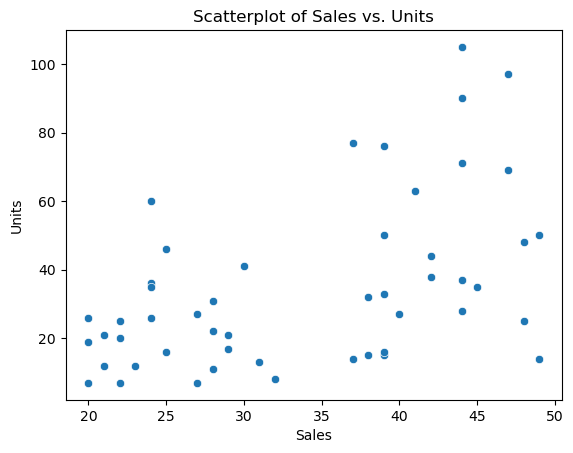

In [13]:
#Creating a scatterplot
sns.scatterplot (x=df['Sales'],y=df['Units'])

#Optionally add labels and a title
plt.title('Scatterplot of Sales vs. Units')
plt.xlabel('Sales')
plt.ylabel('Units')

#Show the plot
plt.show()

#### Intepretation

- The above figure is a scatterplot
- the scatterplot shows a collection of data
- However it looks like the maximum sale happened at restaurants with 45 units

### Line Plot

<Axes: xlabel='Sales', ylabel='Units'>

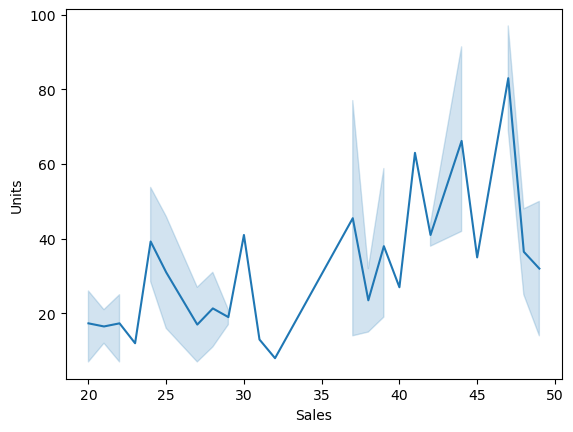

In [14]:
# line plot 
sns.lineplot(x='Sales',y='Units', data=df )

#### Intepretation
- The above figure is a line plot
- From the line plot we can predict the maximum sales after seeing its number of units which in this case is 80

### Box Plot

Text(0.5, 0, 'Sales')

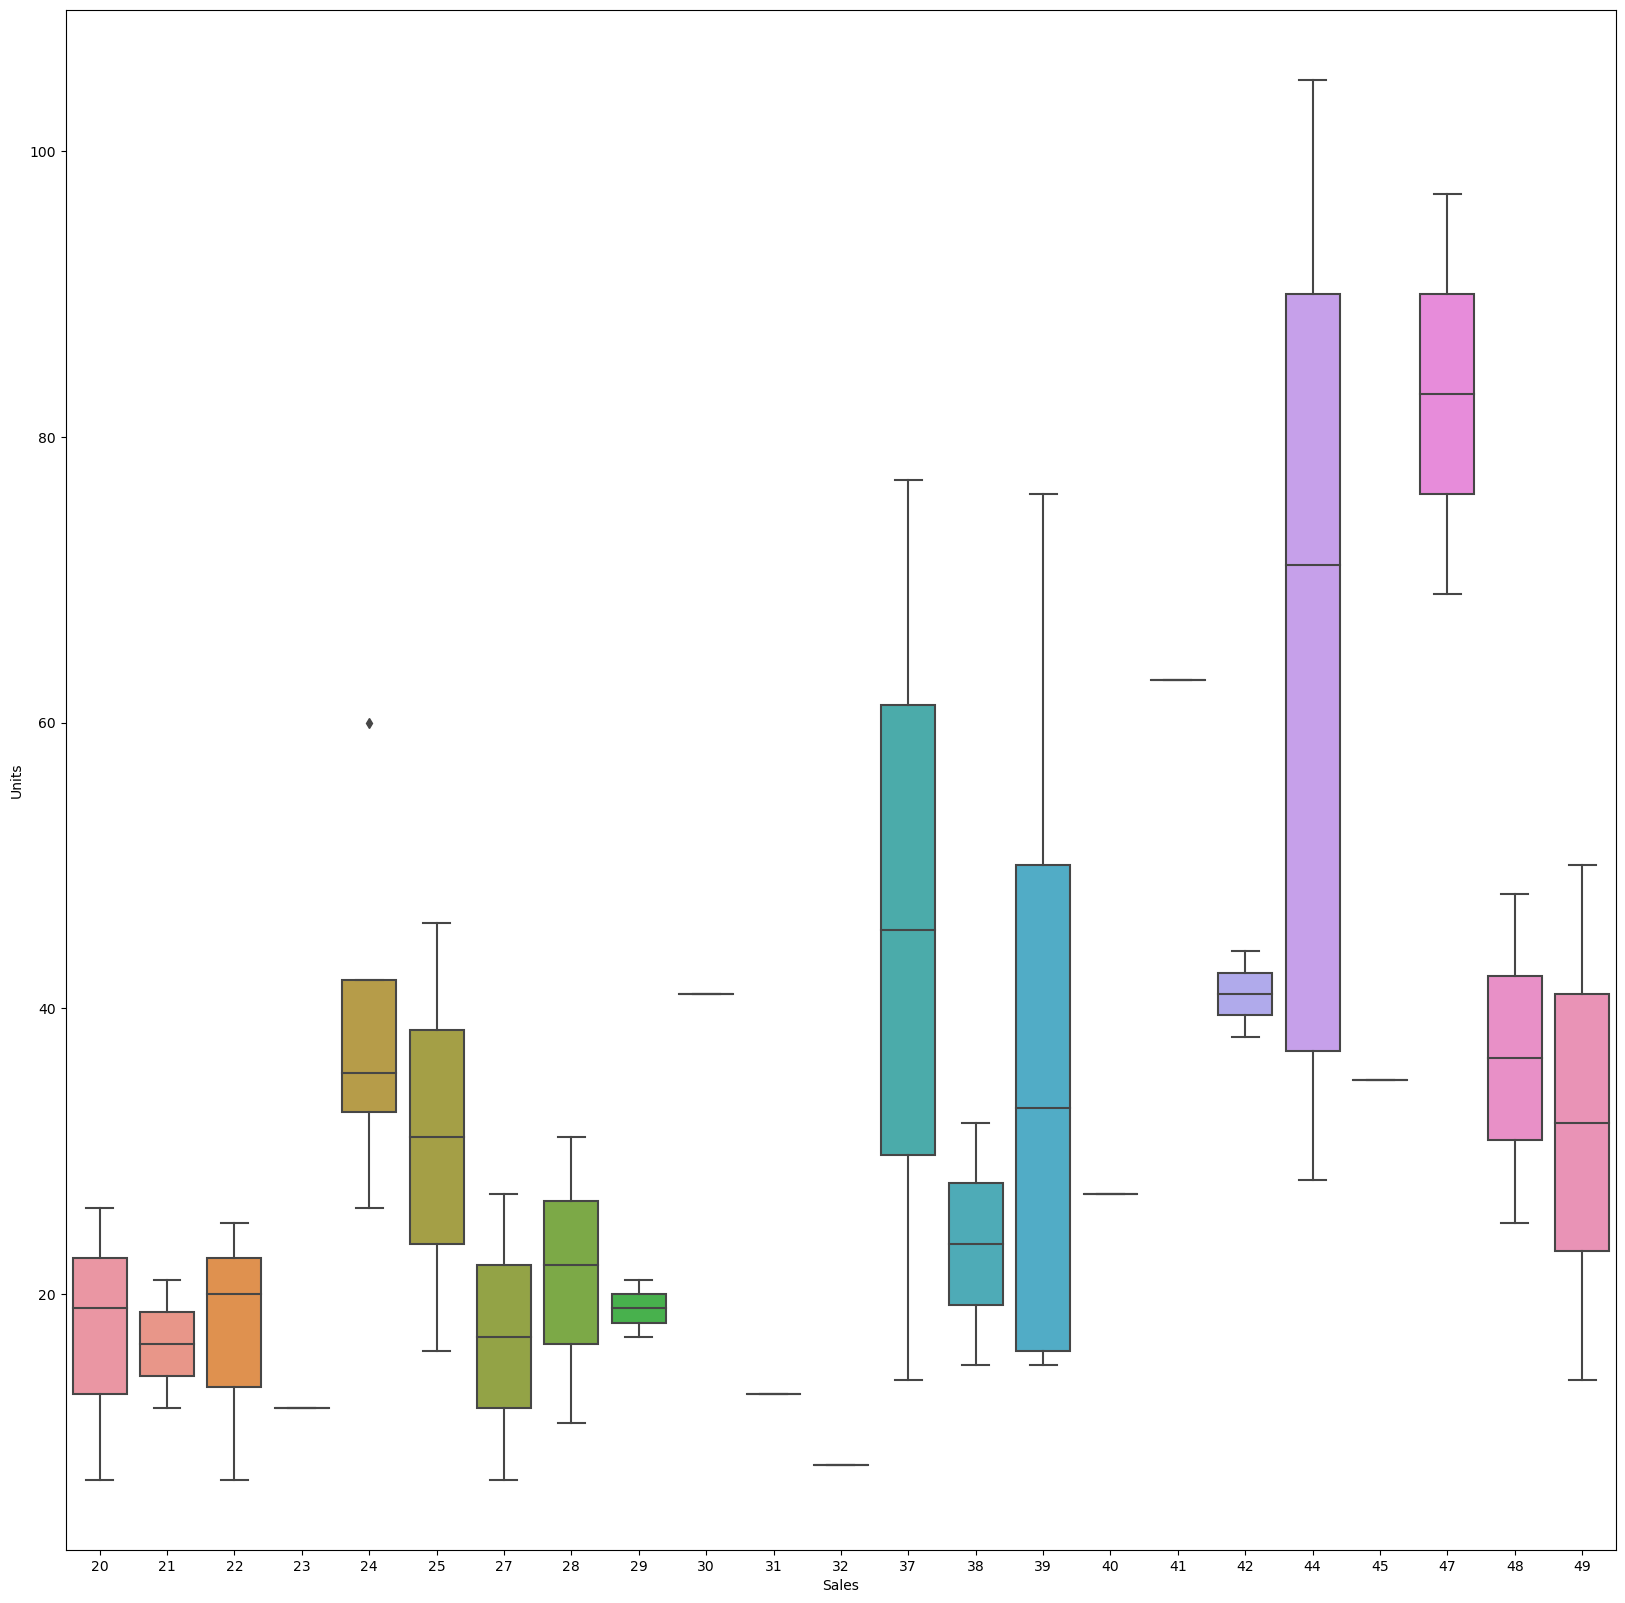

In [19]:
#box plot
plt.figure(figsize=(20,20))
sns.boxplot(y = 'Units',data= df, x= 'Sales')
plt.xlabel('Sales')


### Heat map

C:\Users\Dell\AppData\Local\Temp\ipykernel_14268\1752742378.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


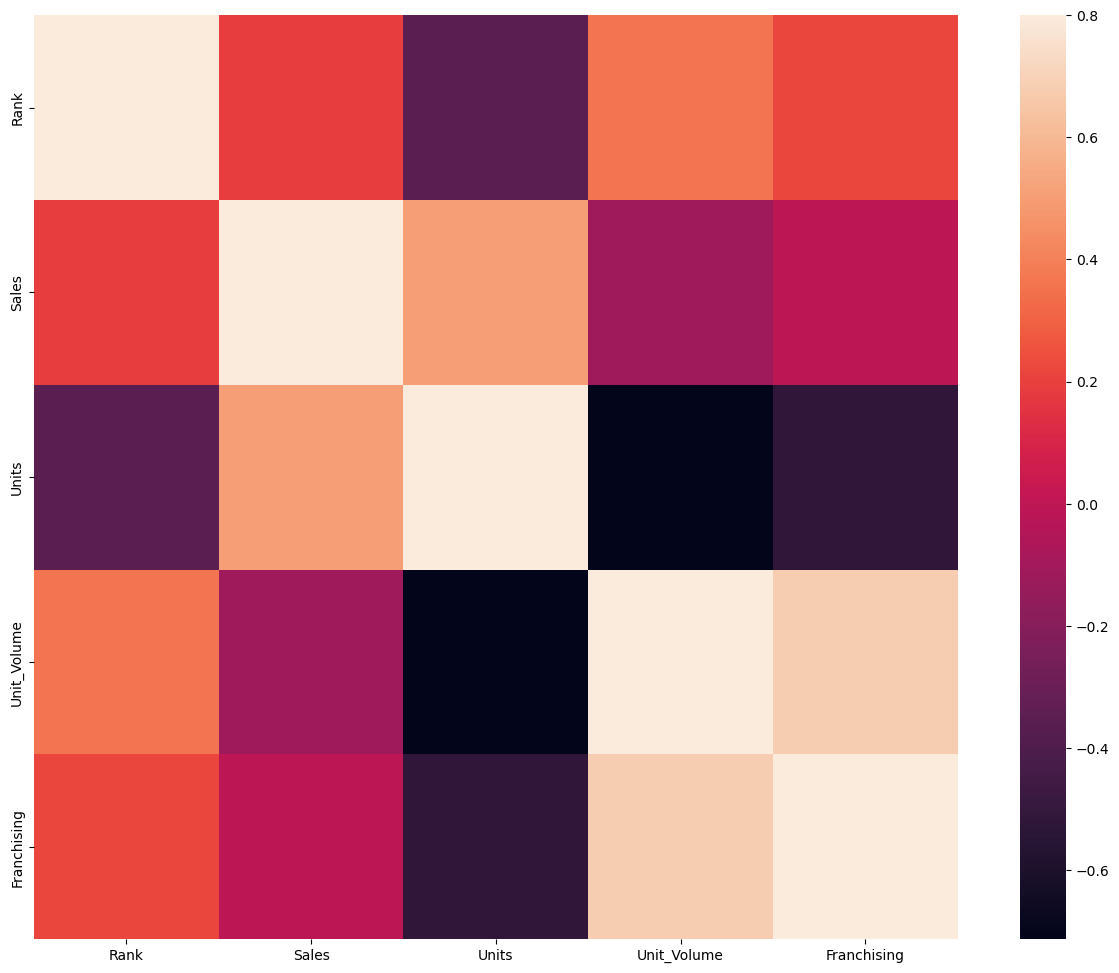

In [20]:
#this is heat map pearson correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

### Intepretation
- The above figure represents a heat map
- Here we can see that the sales and units have a lighter shade which means they have more correlation with each other
- they depend on one another
- the sales increases with the increase in the units and vice versa

##### *From this assignment my objective to find the relationship sales and units were accomplished. I now know they corelate with one another and one has to depend on the other.*

### The end